# Problem Statement

A bank generates revenue through interest, transaction fees, and financial advice, with interest charged on customer loans being a significant source of profits. GODIGT Bank, a mid-sized private bank, offers various banking products and cross-sells asset products to existing customers through different communication methods. However, the bank is facing high credit card attrition, leading them to reevaluate their credit card policy to ensure customers receive the right card for higher spending and intent, resulting in profitable relationships.



# objective
As a Data Scientist at the company and the Data Science team has shared some data. You are supposed to find the key variables that have a vital impact on the analysis which will help the company to improve the business.

### Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Importing data

In [2]:
# reading the xlsx file into pandas dataframe
df = pd.read_excel('C:/Users/AKHIL MOHANDAS/Documents/Project 2/godigt_cc_data.xlsx')
df

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000


### View and describe the data

viewing top 5 records:

In [3]:
df.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


viewing bottom 5 records:

In [4]:
df.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


Shape:

In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  8448 
no. of columns:  28


Retreive the list of fields along with their data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [7]:
df.describe()

,userid,card_bin_no,card_source_date,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,2009-06-19 13:35:17.045454592,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991122,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
min,1.00000,376916.000000,1998-07-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,2004-01-07 18:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,2009-05-24 12:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,2014-11-27 06:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,2020-06-17 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000
std,2438.87187,30489.752417,NaN,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572135,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385


##### Observation:

Data has been loaded correctly into the pandas dataframe.

There are 8448 rows and 28 features.

Found values missing for 'Transactor_revolver'.

### Data Pre-processing

#### Treat BAD Data

In [8]:
df['Occupation_at_source'].unique()

array(['Self Employed', 0, 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

'Occupation_at_source' is currently identified as 'object' datatype. Hence, we cannot retrieve the mean or median value of these fields to replace the bad data.

Hence, first replace 0 with Null.

In [9]:
df['Occupation_at_source'] = df['Occupation_at_source'].replace(0,np.NaN)

In [10]:
df.iloc[7620]

userid                                    7621
card_no                    4375 51XX XXXX XXXX
card_bin_no                             437551
Issuer                                    Visa
card_type                            chartered
card_source_date           2011-06-24 00:00:00
high_networth                                A
active_30                                    0
active_60                                    0
active_90                                    0
cc_active30                                  1
cc_active60                                  1
cc_active90                                  1
hotlist_flag                                 Y
widget_products                              1
engagement_products                          0
annual_income_at_source                1822401
other_bank_cc_holding                        Y
bank_vintage                                38
T+1_month_activity                           0
T+2_month_activity                           0
T+3_month_act

In [11]:
df['Occupation_at_source'].unique()

array(['Self Employed', nan, 'Student', 'Salaried', 'Retired',
       'Housewife'], dtype=object)

#### Treat Anomalies

Lets check the anomaly observed in 'cc_limit'

In [12]:
df['cc_limit'].unique()

array([290000, 950000, 210000,  80000, 220000,  50000,  20000, 260000,
       120000, 440000, 690000, 170000, 150000,  90000, 310000,  30000,
       110000, 130000, 480000, 250000, 430000, 380000, 100000,  60000,
       230000, 580000, 400000, 550000, 190000,  40000, 740000, 140000,
       760000, 930000, 770000, 280000, 360000, 570000, 720000, 750000,
       160000, 700000, 450000, 680000, 370000, 180000,  70000, 460000,
       270000, 470000, 200000, 350000, 980000, 600000, 890000, 340000,
       840000, 530000, 420000, 490000, 860000, 650000, 820000, 610000,
       920000, 300000, 660000, 330000, 320000, 960000, 810000, 410000,
       710000, 940000, 880000, 830000, 800000, 970000, 390000, 790000,
       240000, 590000, 910000, 990000, 560000, 510000, 900000, 540000,
       500000, 520000, 640000, 780000, 850000, 620000, 870000, 670000,
       630000, 730000,      0], dtype=int64)

In [13]:
cc_limit_mean=round(df['cc_limit'].mean(),0)
df['cc_limit'] = df['cc_limit'].replace(0,cc_limit_mean)

In [14]:
df.iloc[7620]

userid                                    7621
card_no                    4375 51XX XXXX XXXX
card_bin_no                             437551
Issuer                                    Visa
card_type                            chartered
card_source_date           2011-06-24 00:00:00
high_networth                                A
active_30                                    0
active_60                                    0
active_90                                    0
cc_active30                                  1
cc_active60                                  1
cc_active90                                  1
hotlist_flag                                 Y
widget_products                              1
engagement_products                          0
annual_income_at_source                1822401
other_bank_cc_holding                        Y
bank_vintage                                38
T+1_month_activity                           0
T+2_month_activity                           0
T+3_month_act

#### Treat Missing Values

In [15]:
df.isnull().sum()

userid                       0
card_no                      0
card_bin_no                  0
Issuer                       0
card_type                    0
card_source_date             0
high_networth                0
active_30                    0
active_60                    0
active_90                    0
cc_active30                  0
cc_active60                  0
cc_active90                  0
hotlist_flag                 0
widget_products              0
engagement_products          0
annual_income_at_source      0
other_bank_cc_holding        0
bank_vintage                 0
T+1_month_activity           0
T+2_month_activity           0
T+3_month_activity           0
T+6_month_activity           0
T+12_month_activity          0
Transactor_revolver         38
avg_spends_l3m               0
Occupation_at_source       261
cc_limit                     0
dtype: int64

In [16]:
## Let's start with Transactor_revolver  feature which has 38 missing values

In [17]:
df['Transactor_revolver'] = df['Transactor_revolver'].replace(np.NAN, df['Transactor_revolver'].mode()[0])

In [18]:
df['Transactor_revolver'].value_counts()

Transactor_revolver
T    7153
R    1295
Name: count, dtype: int64

In [19]:
df['Occupation_at_source'] = df['Occupation_at_source'].replace(np.NAN, df['Occupation_at_source'].mode()[0])

In [20]:
df['Occupation_at_source'].value_counts()

Occupation_at_source
Salaried         4179
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Name: count, dtype: int64

In [21]:
df.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

### Data Preparation

#### Scaling 

In [22]:
## Dropping the ID fearure before we scale numeric values as the same will not add any value in model building
df.drop(labels='userid',axis=1,inplace=True)
df.head()

,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,0,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,0,...,52,0,0,0,0,0,R,280854,Salaried,950000
2,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,0,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [23]:
df.columns

Index(['card_no', 'card_bin_no', 'Issuer', 'card_type', 'card_source_date',
       'high_networth', 'active_30', 'active_60', 'active_90', 'cc_active30',
       'cc_active60', 'cc_active90', 'hotlist_flag', 'widget_products',
       'engagement_products', 'annual_income_at_source',
       'other_bank_cc_holding', 'bank_vintage', 'T+1_month_activity',
       'T+2_month_activity', 'T+3_month_activity', 'T+6_month_activity',
       'T+12_month_activity', 'Transactor_revolver', 'avg_spends_l3m',
       'Occupation_at_source', 'cc_limit'],
      dtype='object')

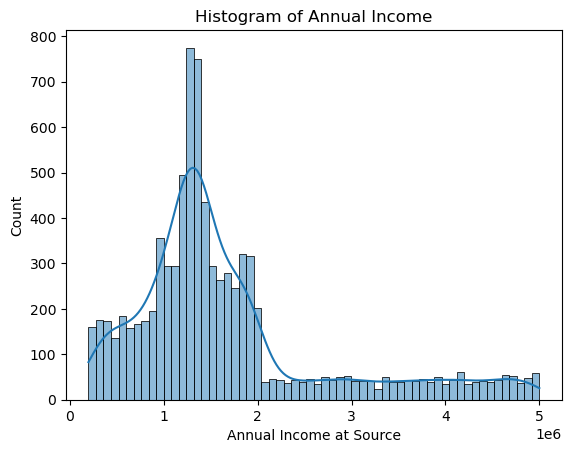

In [24]:
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income at Source')
sns.histplot(data=df,x='annual_income_at_source',kde=True);

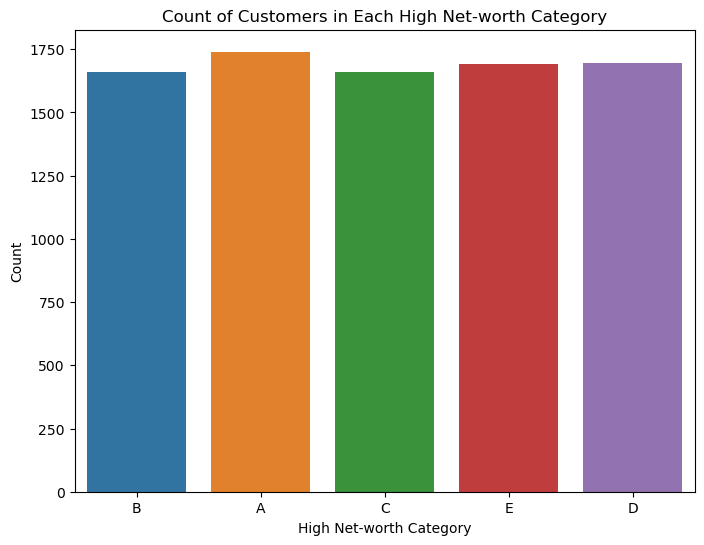

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='high_networth')
plt.title('Count of Customers in Each High Net-worth Category')
plt.xlabel('High Net-worth Category')
plt.ylabel('Count')
plt.show()

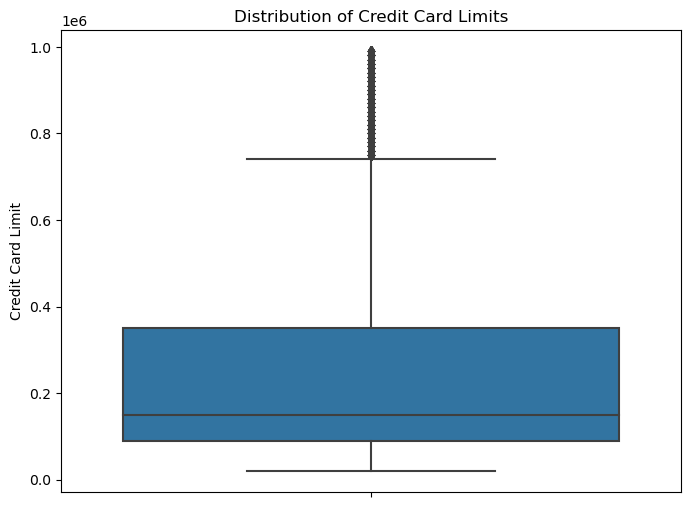

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='cc_limit')
plt.title('Distribution of Credit Card Limits')
plt.ylabel('Credit Card Limit')
plt.show()

found anomalies in Credit card distribution

Treating Anomalies:

In [27]:
df.cc_limit.describe()

count      8448.000000
mean     251736.707741
std      229098.485526
min       20000.000000
25%       90000.000000
50%      150000.000000
75%      350000.000000
max      990000.000000
Name: cc_limit, dtype: float64

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['cc_limit'])
print("lower range",lr, "and upper range", ur)

lower range -300000.0 and upper range 740000.0


In [30]:
df['cc_limit']=np.where(df['cc_limit']>ur,ur,df['cc_limit'])
df['cc_limit']=np.where(df['cc_limit']<lr,lr,df['cc_limit'])

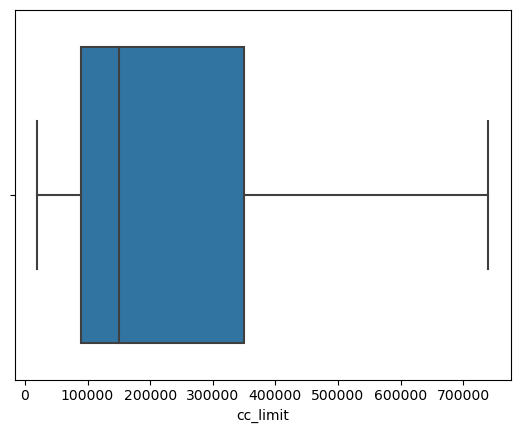

In [31]:
sns.boxplot(x=df.cc_limit);

In [32]:
df.cc_limit.describe()

count      8448.000000
mean     243157.162287
std      206386.469291
min       20000.000000
25%       90000.000000
50%      150000.000000
75%      350000.000000
max      740000.000000
Name: cc_limit, dtype: float64

In [33]:
df['bank_vintage'].describe()

count    8448.000000
mean       33.164181
std        15.868344
min         6.000000
25%        19.000000
50%        33.000000
75%        47.000000
max        60.000000
Name: bank_vintage, dtype: float64

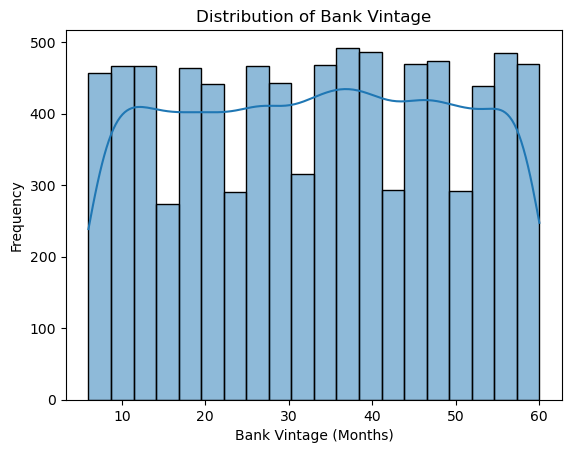

In [34]:
sns.histplot(data=df, x='bank_vintage', kde=True)
plt.title('Distribution of Bank Vintage')
plt.xlabel('Bank Vintage (Months)')
plt.ylabel('Frequency')
plt.show()

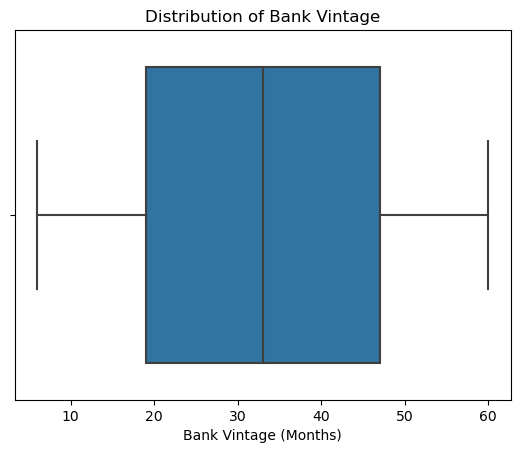

In [35]:
sns.boxplot(data=df, x='bank_vintage')
plt.title('Distribution of Bank Vintage')
plt.xlabel('Bank Vintage (Months)')
plt.show()

The average bank vintage of approximately 33.16 months suggests that, on average, customers maintain a relatively stable relationship with the bank for over 2.5 years. 



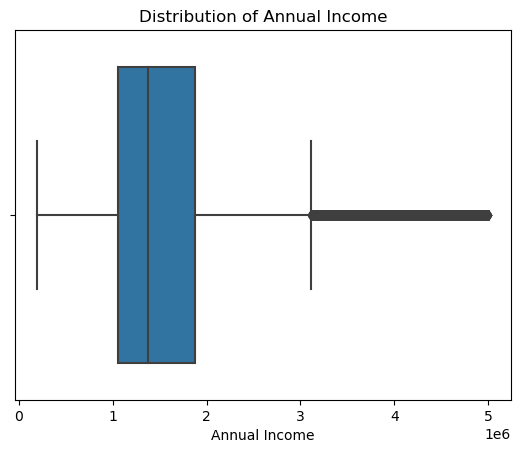

In [36]:
sns.boxplot(data=df, x='annual_income_at_source')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()

Anomalies was found in Annual income, Treating the anomalies:

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['annual_income_at_source'])
print("lower range",lr, "and upper range", ur)

df['annual_income_at_source']=np.where(df['annual_income_at_source']>ur,ur,df['annual_income_at_source'])
df['annual_income_at_source']=np.where(df['annual_income_at_source']<lr,lr,df['annual_income_at_source'])

lower range -169841.375 and upper range 3112679.625


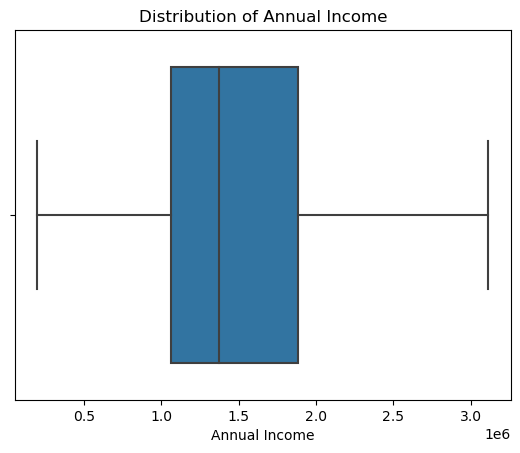

In [38]:
sns.boxplot(data=df, x='annual_income_at_source')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [39]:
df['annual_income_at_source'].describe()

count    8.448000e+03
mean     1.555182e+06
std      7.880649e+05
min      2.000950e+05
25%      1.061104e+06
50%      1.372134e+06
75%      1.881734e+06
max      3.112680e+06
Name: annual_income_at_source, dtype: float64

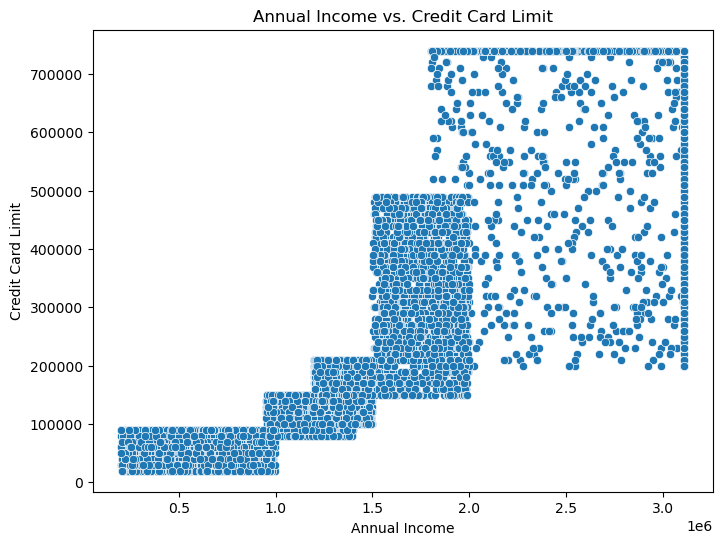

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='annual_income_at_source', y='cc_limit')
plt.title('Annual Income vs. Credit Card Limit')
plt.xlabel('Annual Income')
plt.ylabel('Credit Card Limit')
plt.show()

Annual Income and Credit card limit have a positive correlation.

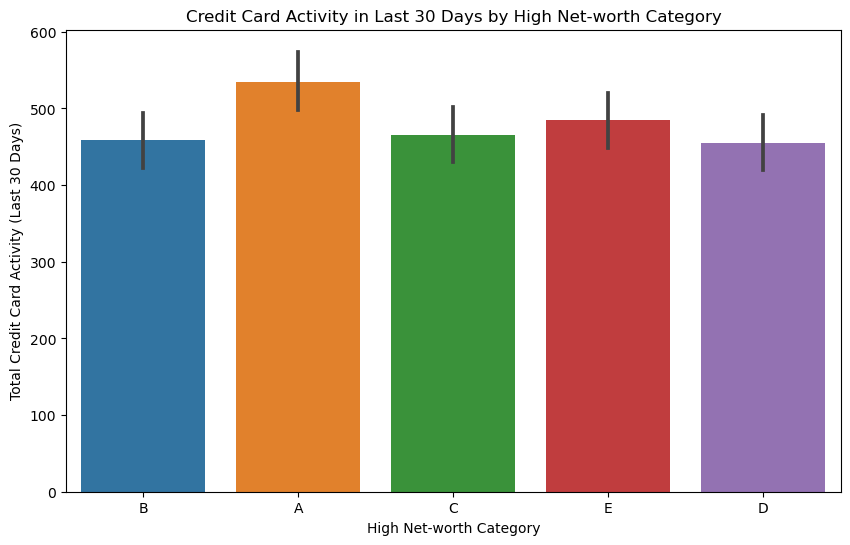

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='high_networth', y='cc_active30', estimator=sum)
plt.title('Credit Card Activity in Last 30 Days by High Net-worth Category')
plt.xlabel('High Net-worth Category')
plt.ylabel('Total Credit Card Activity (Last 30 Days)')
plt.show()

In [42]:
df.groupby('high_networth')['cc_active30'].sum()

high_networth
A    535
B    459
C    466
D    455
E    485
Name: cc_active30, dtype: int64

(Category A) have shown the highest credit card activity in the last 30 days.
(Category C) have shown more credit card activity in the last 30 days than category B,eventhough networth value is more for B.

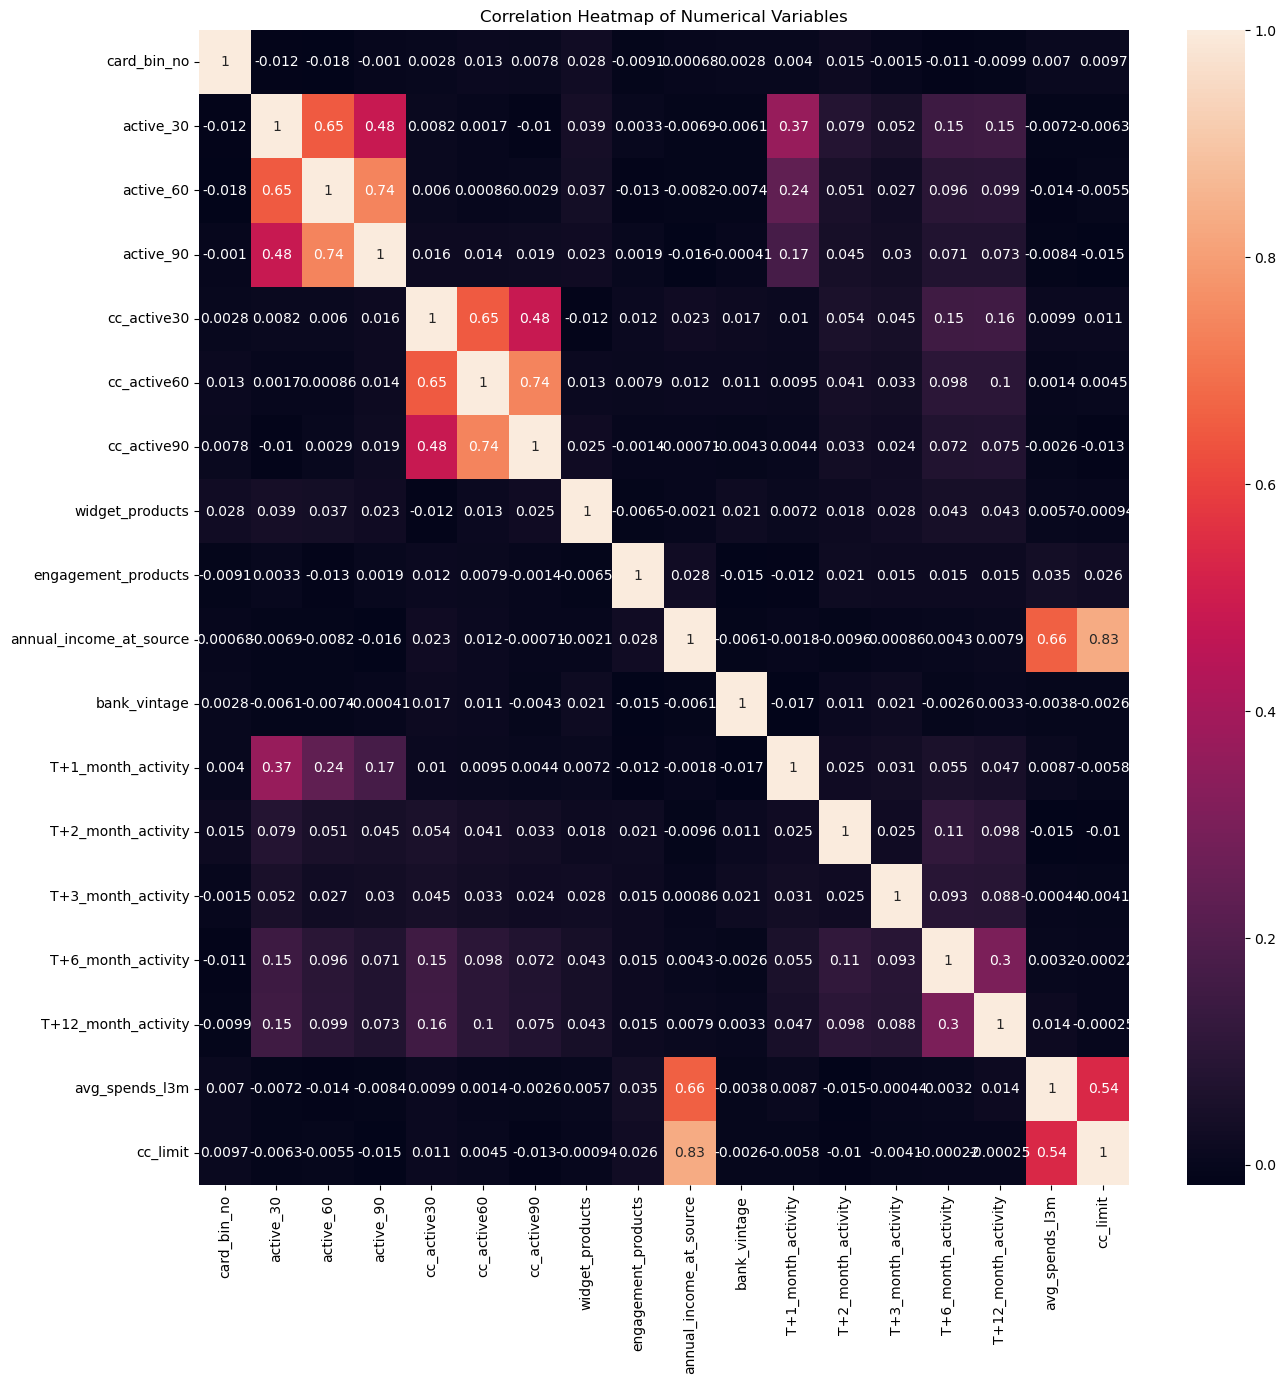

In [43]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 15))
sns.heatmap(num_df.corr(), annot=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Annual income at source and cc limit has a positive correlation.

cc activity 60 and cc activity 90 have a strong correlation,Customers who have been actively using their credit cards over the past 60 days tend to maintain a similar level of activity over the next 30 days 

Key Questions:

1.How does the total number of convenience products vary across different net worth categories?

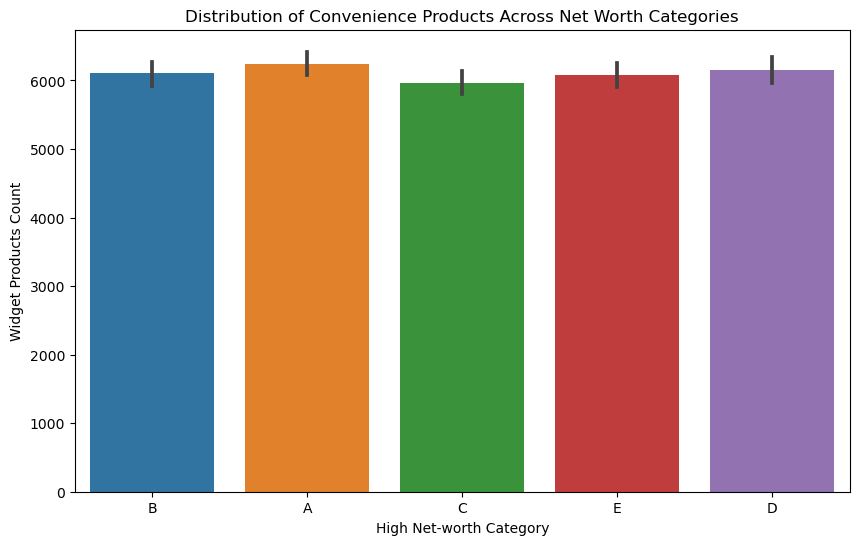

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='high_networth', y='widget_products', estimator=sum)
plt.title('Distribution of Convenience Products Across Net Worth Categories')
plt.xlabel('High Net-worth Category')
plt.ylabel('Widget Products Count')
plt.show()

In [45]:
df.groupby('high_networth')['widget_products'].sum()

high_networth
A    6240
B    6103
C    5965
D    6147
E    6081
Name: widget_products, dtype: int64

Across all high net-worth categories (A to E), there is a relatively consistent total sum of widget products held by customers. The difference between the highest and lowest sum is not substantial, indicating that customers in different net-worth categories tend to utilize a similar number of widget products offered by the bank.

This indicates that the bank's widget products are appealing to a broad spectrum of customers, including those with varying levels of wealth

2.How does the total spending in the last 3 months vary across different credit card issuers?

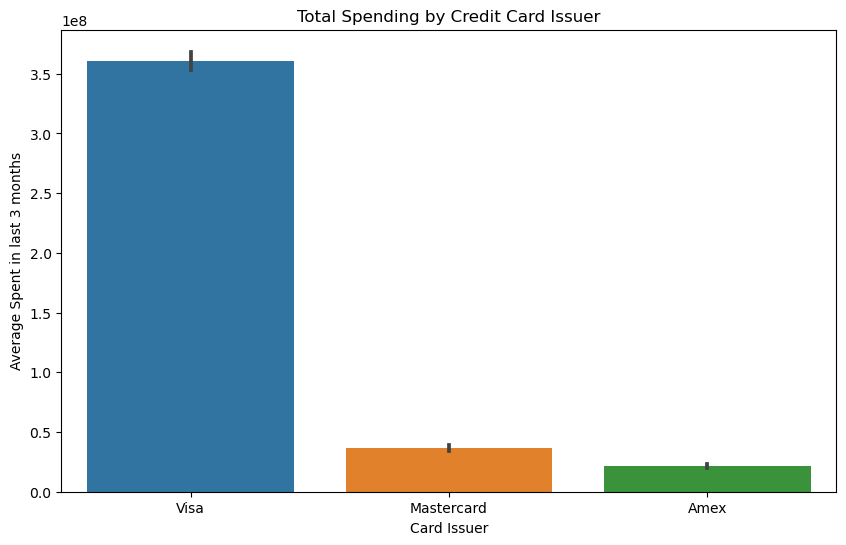

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Issuer', y='avg_spends_l3m', estimator=sum)
plt.title('Total Spending by Credit Card Issuer')
plt.xlabel('Card Issuer')
plt.ylabel('Average Spent in last 3 months')
plt.show()

In [47]:
df.groupby('Issuer')['avg_spends_l3m'].sum()

Issuer
Amex           21598668
Mastercard     36338549
Visa          360469967
Name: avg_spends_l3m, dtype: int64

Visa dominates in terms of total spending volume, followed by Mastercard, while American Express occupies a smaller share of the market in terms of total spending in the last 3 months.

3.To what extent does the occurrence of hot-listed cards differ among various issuers, and how does this variation change with respect to the card type?

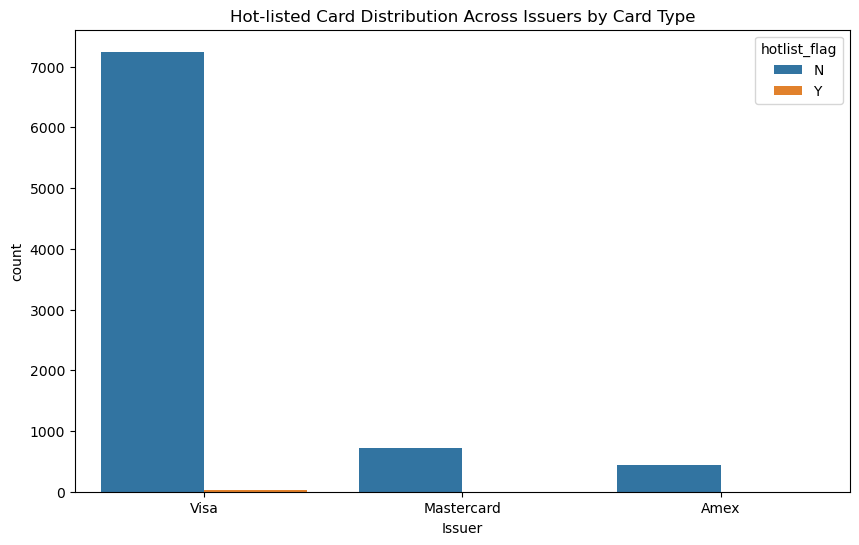

In [48]:
plt.figure(figsize=(10, 6))
plt.title('Hot-listed Card Distribution Across Issuers by Card Type')
plt.xlabel('Issuer')
plt.ylabel('Count')
sns.countplot(data=df,x='Issuer',hue='hotlist_flag');

In [49]:
pd.crosstab(df['Issuer'], df['hotlist_flag'], margins=True, normalize = False)

hotlist_flag,N,Y,All
Issuer,,,
Amex,438,3,441
Mastercard,727,1,728
Visa,7245,34,7279
All,8410,38,8448


While hot-listed cards are relatively rare across all issuers and card types, Visa cards exhibit a slightly higher occurrence compared to Amex and Mastercard.

4.Understanding Card Usage.What types of credit cards are preferred by our customers?

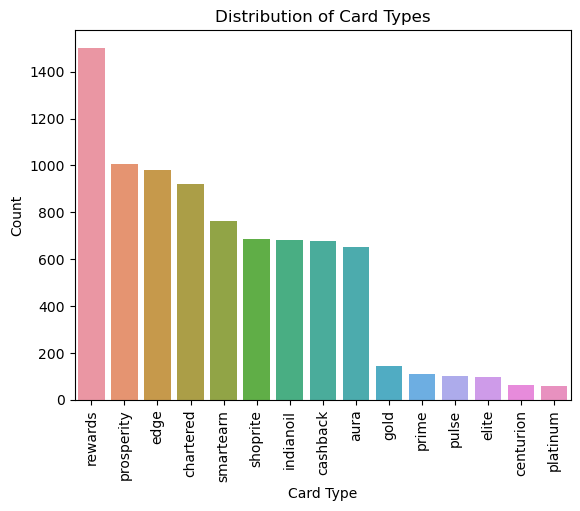

In [50]:
sns.countplot(data=df, x='card_type',order=df['card_type'].value_counts().index)
plt.title('Distribution of Card Types')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [51]:
df.groupby('card_type')['avg_spends_l3m'].mean()

card_type
aura          31580.196319
cashback      30049.690828
centurion     82440.564516
chartered     77330.923077
edge          78981.873469
elite         76668.229167
gold          46164.641379
indianoil     32356.322059
platinum      73599.711864
prime         80403.357143
prosperity    75789.428004
pulse         69031.188119
rewards       31516.928096
shoprite      30667.816860
smartearn     29384.892810
Name: avg_spends_l3m, dtype: float64

In [52]:
df['card_type'].value_counts()

card_type
rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: count, dtype: int64

The analysis reveals that certain card types such as Rewards, Prosperity, and Edge are more popular among customers, as indicated by their higher counts. This suggests that customers are attracted to these card types, possibly due to their benefits, rewards programs, or associated perks.

5.Average credit card spending over the last 3 months for different occupation categories

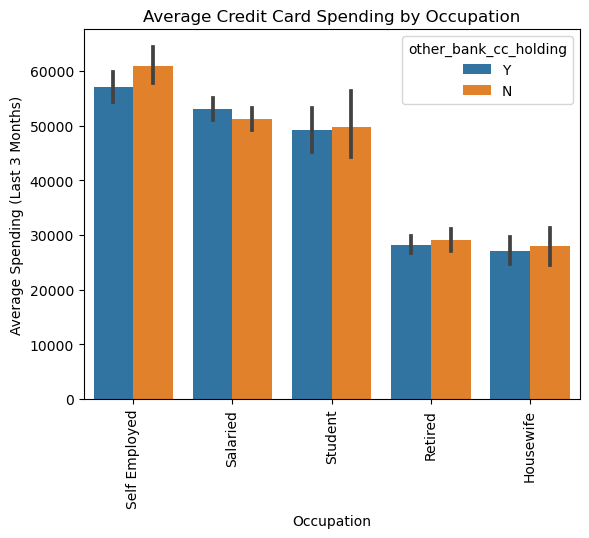

In [53]:
sns.barplot(data=df, x='Occupation_at_source', y='avg_spends_l3m',hue='other_bank_cc_holding')
plt.title('Average Credit Card Spending by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Spending (Last 3 Months)')
plt.xticks(rotation=90)
plt.show()

In [54]:
pd.crosstab(index=df['Occupation_at_source'],columns=df['other_bank_cc_holding'],values=df['avg_spends_l3m'],aggfunc='mean',margins=True,normalize=False)

other_bank_cc_holding,N,Y,All
Occupation_at_source,,,
Housewife,28056.603053,27099.442688,27425.973958
Retired,29054.807440,28227.810127,28574.860422
Salaried,51216.918534,53092.664108,52211.122039
Self Employed,60997.789700,57147.403862,58797.316322
Student,49756.300847,49196.514286,49409.251208
All,50036.536828,49126.748519,49527.365530


Both housewife and retired customers have similar average spending levels, regardless of whether they hold credit cards from other banks.

Salaried customers who do not hold credit cards from other banks have a lower average spending compared to those who do.

Self-employed customers, regardless of other bank credit card holdings, exhibit the highest average spending among all occupation types.

Students have relatively lower average spending compared to other occupation categories.

Across all occupation types, customers who hold credit cards from other banks generally exhibit slightly higher average spending compared to those who do not.

6.What occupations have a higher concentration of high-net-worth customers compared to others?

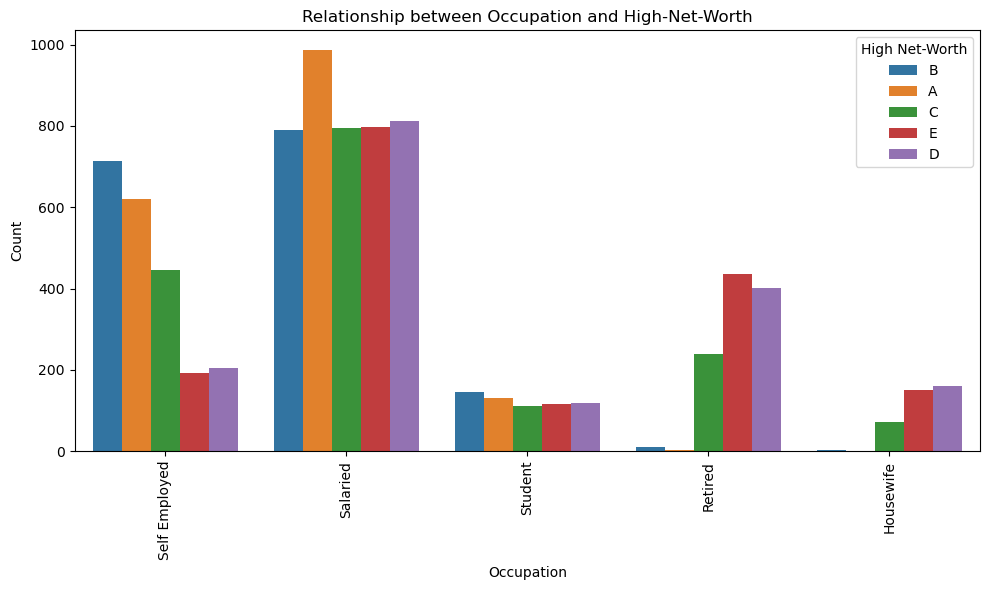

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation_at_source', hue='high_networth')
plt.title('Relationship between Occupation and High-Net-Worth')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='High Net-Worth', loc='upper right')
plt.tight_layout()
plt.show()

In [56]:
pd.crosstab(index=df['Occupation_at_source'],columns=df['high_networth'],margins=True,normalize=False)

high_networth,A,B,C,D,E,All
Occupation_at_source,,,,,,
Housewife,0,3,71,160,150,384
Retired,3,10,238,402,436,1089
Salaried,986,789,795,811,798,4179
Self Employed,621,713,445,204,192,2175
Student,130,145,110,119,117,621
All,1740,1660,1659,1696,1693,8448


Self-Employed individuals and Salaried employees exhibit the highest concentration
of high-net-worth customers, with proportions of 28.5% and 23.6%, respectively.

7.How does the occupation of our customers relate to both their credit card activity in the next month (T+1) and their total annual income?

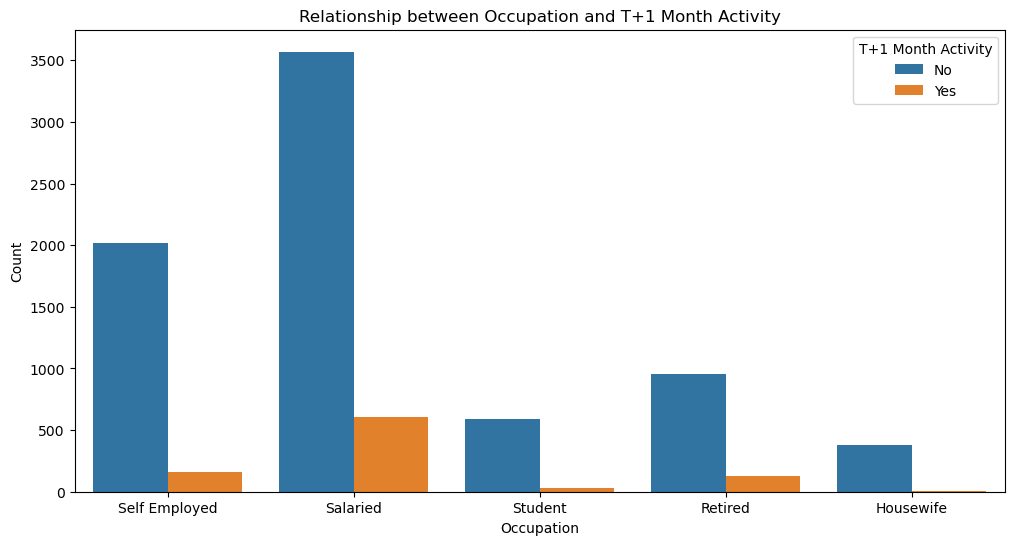

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation_at_source', hue='T+1_month_activity')
plt.title('Relationship between Occupation and T+1 Month Activity')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='T+1 Month Activity', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [58]:
df.groupby('Occupation_at_source')['T+1_month_activity'].value_counts()

Occupation_at_source  T+1_month_activity
Housewife             0                      375
                      1                        9
Retired               0                      958
                      1                      131
Salaried              0                     3569
                      1                      610
Self Employed         0                     2014
                      1                      161
Student               0                      592
                      1                       29
Name: count, dtype: int64

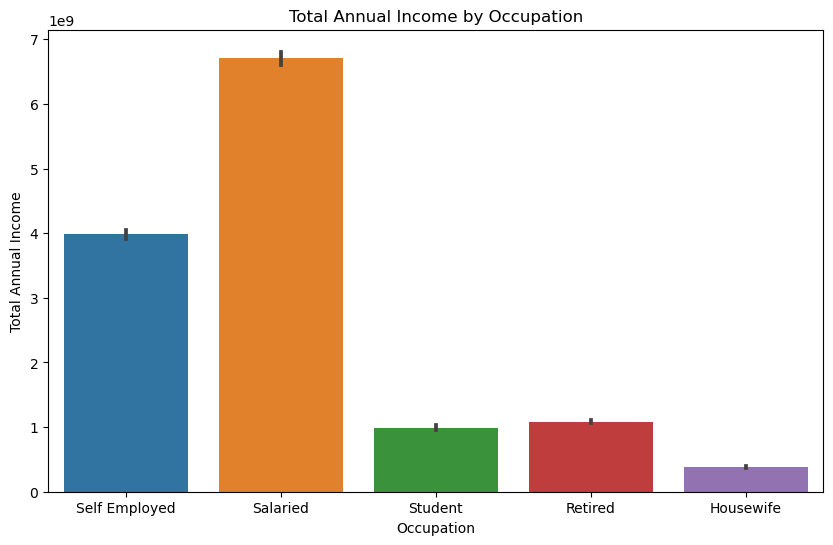

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Occupation_at_source', y='annual_income_at_source', estimator=sum)
plt.title('Total Annual Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Annual Income')
plt.show()

In [60]:
df.groupby('Occupation_at_source')['annual_income_at_source'].sum().sort_values()

Occupation_at_source
Housewife        3.815050e+08
Student          9.896368e+08
Retired          1.083431e+09
Self Employed    3.980856e+09
Salaried         6.702745e+09
Name: annual_income_at_source, dtype: float64

There seems to be a variation in credit card activity (T+1) across different occupations, with salaried and self-employed individuals exhibiting higher activity compared to housewives, retired individuals, and students.

This suggests that occupation may influence the likelihood of engaging in credit card transactions in the subsequent month, possibly due to factors such as income stability, spending habits, or financial obligations.

Housewives and students have lower total annual incomes compared to other occupation categories, which may be attributed to their dependency on other sources of income or part-time employment.